In [1]:
import cv2
from matplotlib import pyplot as plt
import keras
from keras.src.legacy.preprocessing.image import ImageDataGenerator

train_dir="dataset/train/"
test_dir="dataset/test/"

img=cv2.imread("dataset/train/happy/im0.png")
img_size=img.shape[0]
print(img_size)



2025-01-02 18:23:39.541761: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-02 18:23:39.550886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 18:23:39.561569: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-02 18:23:39.564660: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-02 18:23:39.572711: I tensorflow/core/platform/cpu_feature_guar

48


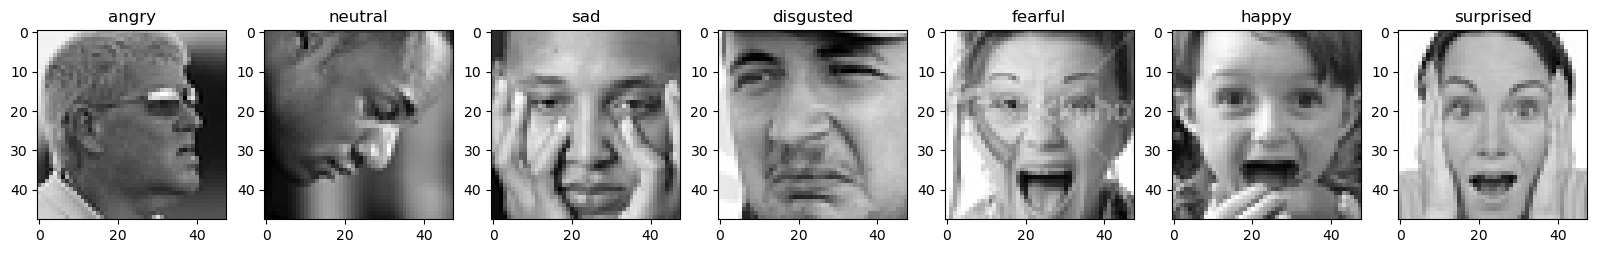

In [2]:
import matplotlib.pyplot as plt
import os

target_var = os.listdir(train_dir)
fig, axes = plt.subplots(1, len(target_var), figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d), cmap='gray')
    axes[i].set_title(target_var[i])
plt.show()


In [3]:
#vgg16 model
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
import numpy as np

#block n1
model=keras.Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu", input_shape=(img_size,img_size,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))


#block n2
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n3
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n4
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n5
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#top 
model.add(Flatten())
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(target_var),activation="softmax"))

# result=model.predict(np.array([img_rgb]))

# print(result)





/home/gojo/anaconda3/envs/My_env1/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1735842222.108172   44118 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735842222.218734   44118 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735842222.218914   4

In [4]:
#model compile and optimizer
from keras.optimizers import Adam,RMSprop,SGD,Adamax

model.compile(
    optimizer = Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [5]:
model.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,437,767 (39.82 MB)

 Trainable params: 10,434,823 (39.81 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [6]:
#data augmentation 

train_datagen=ImageDataGenerator(rotation_range=180, #rotates the image with the amount of degrees we provide
                                         width_shift_range=0.1, #shifts the image randomly to the right or left along the width of the image
                                         height_shift_range=0.1, #shifts image randomly to up or below along the height of the image
                                         horizontal_flip=True, #flips the image horizontally
                                         rescale=1./255, #to scale down the pizel values in our image between 0 and 1
                                         zoom_range=0.2, #applies random zoom to our object
                                         validation_split=0.2 #reserves some images to be used for validation purpose
                                        )
validation_datagen=ImageDataGenerator(rescale=1./255,
                                         validation_split=0.2)

In [7]:
epochs = 200
batch_size = 64

In [8]:
#apply data augmentation

train_generator=train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator=validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [9]:
import sys

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print(f"Tensor Flow Version: {tf.__version__}")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))




Tensor Flow Version: 2.17.0
Num GPUs Available:  1


In [12]:
with tf.device('/gpu:0'):

    history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)


Epoch 1/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5727 - loss: 1.1259 - val_accuracy: 0.5775 - val_loss: 1.1026
Epoch 2/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5776 - loss: 1.1343 - val_accuracy: 0.5992 - val_loss: 1.0730
Epoch 3/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5765 - loss: 1.1279 - val_accuracy: 0.5698 - val_loss: 1.1059
Epoch 4/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5753 - loss: 1.1183 - val_accuracy: 0.5628 - val_loss: 1.1542
Epoch 5/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5765 - loss: 1.1293 - val_accuracy: 0.5803 - val_loss: 1.1107
Epoch 6/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5721 - loss: 1.1261 - val_accuracy: 0.5810 - val_loss: 1.1112
Epoch 7/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5734 - loss: 1.1341 - val_accuracy: 0.5705 - val_loss: 1.1284
Epoch 8/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.5751 - loss: 1

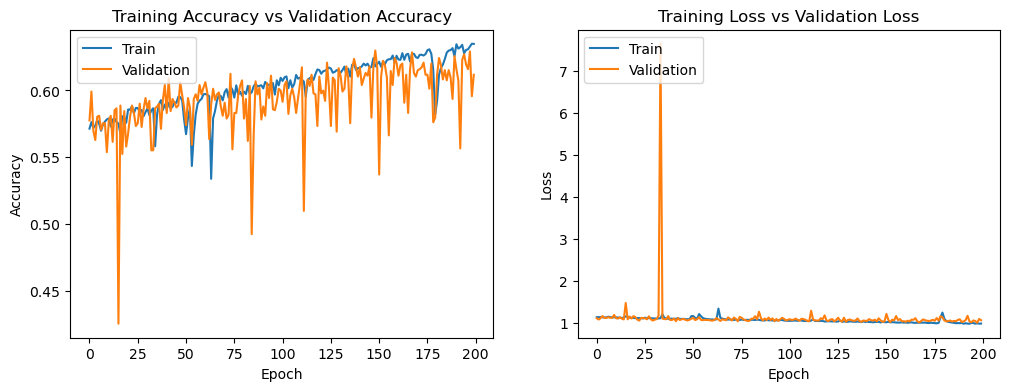

In [13]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [14]:
model.save('model.h5')


(48, 48)


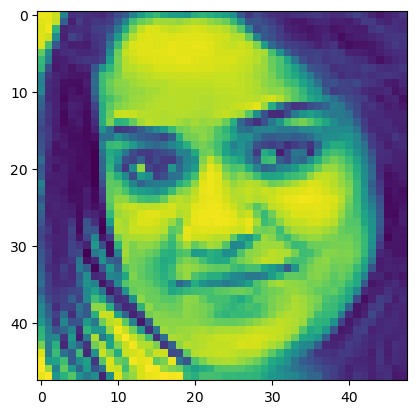

In [22]:
from keras.preprocessing import image

img = image.load_img("dataset/test/happy/im1.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [23]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}


In [24]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [25]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()


Happy


In [26]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6701 - loss: 0.8522

2025-01-02 19:58:29.235931: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 12 bytes spill stores, 12 bytes spill loads

2025-01-02 19:58:29.348044: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_241', 260 bytes spill stores, 260 bytes spill loads



359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.6702 - loss: 0.8521
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6069 - loss: 1.0199
final train accuracy = 67.50 , validation accuracy = 61.17


In [28]:
model.save_weights('model.weights.h5')
